In [409]:
import pandas as pd
import seaborn as sns
from geopy import geocoders 
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('noc_regions.csv',encoding="utf8")

In [6]:
data.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [7]:
data.tail()

,NOC,region,notes
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN
229,ZIM,Zimbabwe,NaN


In [75]:
athlete = pd.read_csv('athlete_events.csv',encoding="utf8")

In [9]:
athlete.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [10]:
athlete.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [65]:
athlete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [67]:
athlete.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [434]:
#Participants from different Countries
import plotly.plotly as py
import plotly.graph_objs as go
import cufflinks as cf
import folium
cf.go_offline()
import plotly
plotly.tools.set_credentials_file(username='raj_shah14', api_key='7RAnmwiyHUuhhEMylQay')

# Over the years Participation from Different Countries


In [436]:
world_geo = './world-countries.json'
df = pd.DataFrame(athlete['NOC'].value_counts())
d = df.rename_axis('country').reset_index('country')


In [437]:
# Initialize the map:
m = folium.Map(location=[20, 0], zoom_start=2)
 
# Add the color for the chloropleth:
folium.Choropleth(
 geo_data=world_geo,
 name='choropleth',
 data=d,
 columns=['country', 'NOC'],
 key_on='feature.id',
 fill_color='YlGn',
 fill_opacity=0.7,
 nan_fill_color='gray',
 nan_fill_opacity=0.3,
 line_opacity=0.2,
 legend_name='Number of Participants'
).add_to(m)
m

# Male to Female Participation in Olympics

In [392]:
seasonM = athlete[(athlete['Sex'] == 'M')].groupby(['Season']).size().to_frame().reset_index()
seasonF = athlete[(athlete['Sex'] == 'F')].groupby(['Season']).size().to_frame().reset_index()

In [395]:
labels = ['Male','Female']
valuesS = [seasonM[0][0],seasonF[0][0]]
valuesW = [seasonM[0][1],seasonF[0][1]]

In [406]:
fig = {
  "data": [
    {
      "values": valuesS,
      "labels": labels,
      "domain": {"column": 0},
      "name": "Summer",
      "hoverinfo":"label+percent+name",
      "hole": .5,
      "type": "pie"
    },
  {
      "values": valuesW,
      "labels": labels,
      "domain": {"column": 1},
      "name": "Winter",
      "hoverinfo":"label+percent+name",
      "hole": .5,
      "type": "pie"
    }],
  "layout": {
        "title":"Male to Female Participation in Different Season",
        "grid": {"rows": 1, "columns": 2},
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Summer",
                "x": 0.20,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Winter",
                "x": 0.8,
                "y": 0.5
            },
        ]
    }
}
py.iplot(fig, filename='donut')

# Top 10 Medal Winners

In [138]:
gold=athlete.loc[athlete['Medal']=='Gold'].groupby(['Name','Sport','Team']).size().to_frame().reset_index()
gold.columns=['Name','Sport','region','count']
gold.sort_values('count',ascending=False,inplace=True)
gold = gold.head(10)

Text(0.5, 1.0, 'Most Medal Won by person')

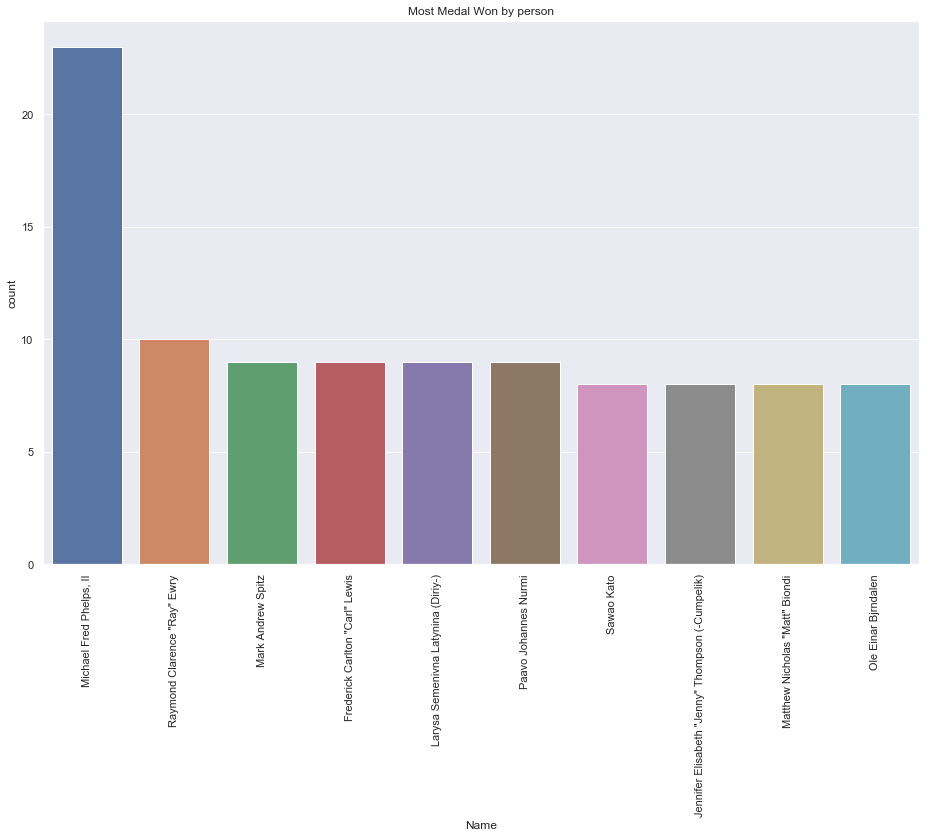

In [144]:
ax = sns.barplot(x=gold['Name'], y=gold['count'], capsize=.2)
ax.set_xticklabels(gold['Name'],rotation=90)
ax.set_title("Most Medal Won by person")

# Age distribution of Athletes

Text(0.5, 1.0, 'Age Distribution of Athletes')

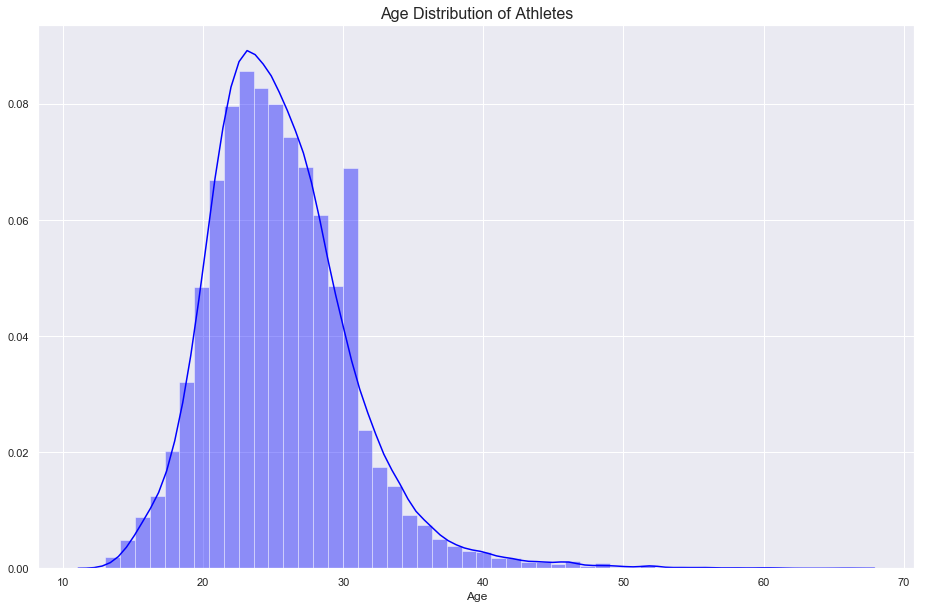

In [146]:
x=sns.distplot(athlete['Age'].dropna(),color='Blue',kde=True)
x.set_title('Age Distribution of Athletes',fontsize=16,fontweight=200)

# Weight Distribution of Athletes 

Text(0.5, 1.0, 'Weight Distribution of Athletes')

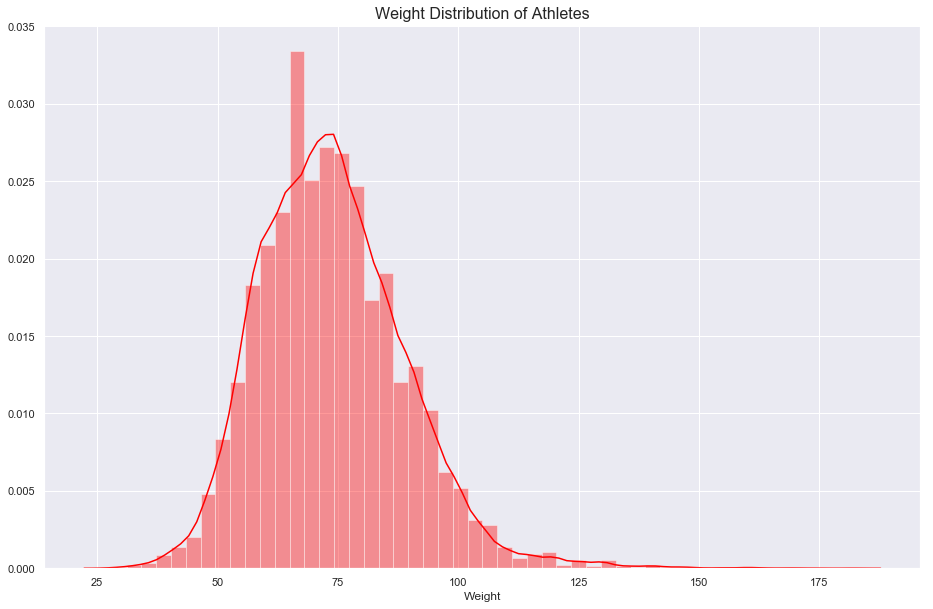

In [369]:
x=sns.distplot(athlete['Weight'].dropna(),color='Red',kde=True,norm_hist=True)
x.set_title('Weight Distribution of Athletes',fontsize=16,fontweight=200)

# Height Distribution of Athletes

Text(0.5, 1.0, 'Height Distribution of Athletes')

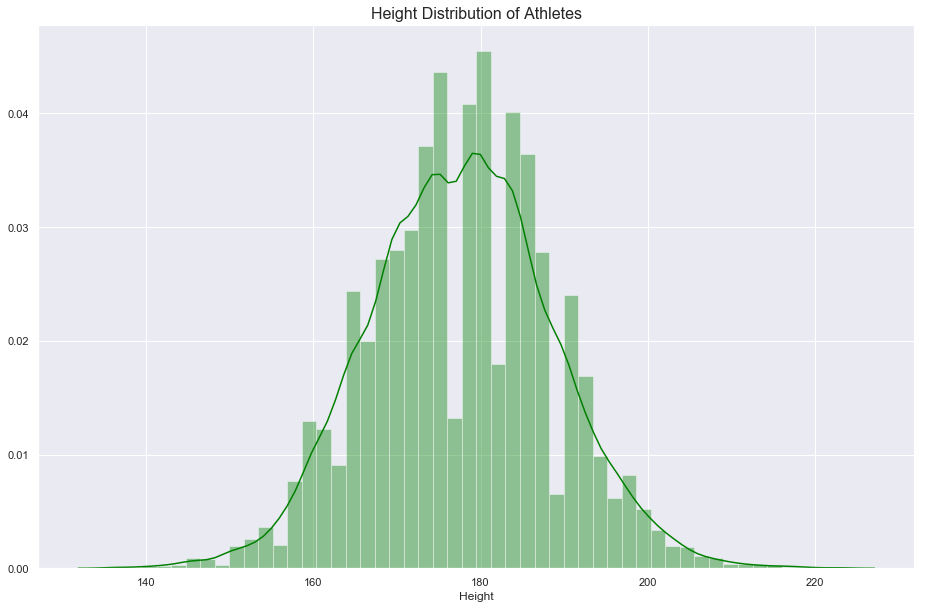

In [368]:
x=sns.distplot(athlete['Height'].dropna(),color='Green',kde=True,norm_hist=True)
x.set_title('Height Distribution of Athletes',fontsize=16,fontweight=200)

# Medals Won by Countries

In [350]:
gold_by_country = athlete[(athlete['Medal'] == 'Gold')].groupby(['Team']).size().to_frame().reset_index()
gold_by_country.columns=['Team','count']

silver_by_country = athlete[(athlete['Medal'] == 'Silver')].groupby(['Team']).size().to_frame().reset_index()
silver_by_country.columns=['Team','count']

bronze_by_country = athlete[(athlete['Medal'] == 'Bronze')].groupby(['Team']).size().to_frame().reset_index()
bronze_by_country.columns=['Team','count']


gold_data = go.Bar(
            x=gold_by_country['Team'],
            y=gold_by_country['count'],
            name = 'Gold'
    )

silver_data = go.Bar(
            x=silver_by_country['Team'],
            y=silver_by_country['count'],
            name = 'Silver'
    )

bronze_data = go.Bar(
            x=bronze_by_country['Team'],
            y=bronze_by_country['count'],
            name = 'Bronze'
    )

layout = go.Layout(
    title='Medals by Countries',
    barmode='stack'
)

data = [gold_data,silver_data,bronze_data]

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [204]:
geolocator = Nominatim(user_agent="OlympicAnalysis")
locat = geolocator.geocode("Paris")
locat

Location(Paris, Île-de-France, France métropolitaine, France, (48.8566101, 2.3514992, 0.0))

In [304]:
hostcity = athlete['City'].drop_duplicates()
hostcities = pd.DataFrame(hostcity,columns=['City'])
# hostcities

In [292]:
location = []
for i in hostcities['City']:
    location.append(geolocator.geocode(i)[-1])

In [293]:
loc = pd.DataFrame(location,columns=['lat', 'lon'])

Text(0.5, 1.0, 'Host Cities for the olympics')

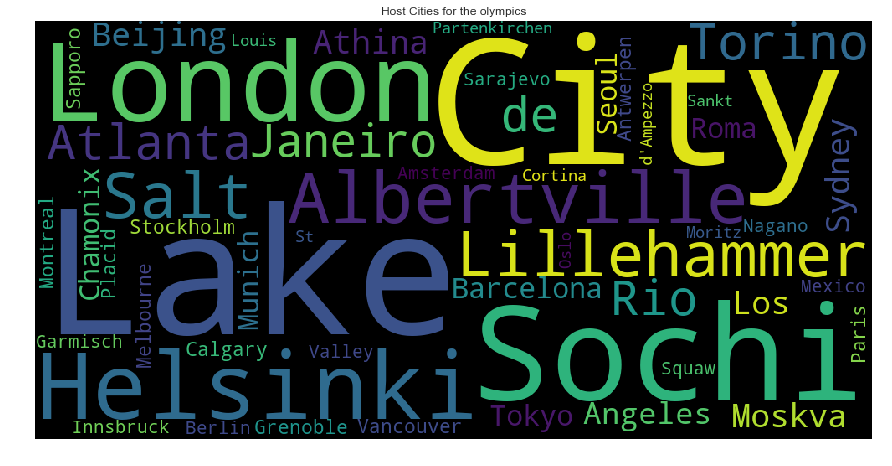

In [411]:
unique_string=(" ").join(hostcity)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Host Cities for the olympics')

In [438]:
cities = athlete['City'].groupby(athlete['Season']).unique()
cities['Summer'],cities['Winter']

(array(['London', 'Helsinki', 'Atlanta', 'Rio de Janeiro', 'Beijing',
        'Sydney', 'Athina', 'Moskva', 'Los Angeles', 'Barcelona', 'Seoul',
        'Roma', 'Tokyo', 'Munich', 'Stockholm', 'Paris', 'Antwerpen',
        'Montreal', 'Melbourne', 'Mexico City', 'Berlin', 'Amsterdam',
        'St. Louis'], dtype=object),
 array(['Sochi', 'Albertville', 'Lillehammer', 'Salt Lake City', 'Torino',
        'Chamonix', 'Calgary', 'Grenoble', 'Vancouver', 'Sapporo',
        'Lake Placid', 'Sarajevo', 'Nagano', 'Squaw Valley', 'Innsbruck',
        'Garmisch-Partenkirchen', "Cortina d'Ampezzo", 'Oslo',
        'Sankt Moritz'], dtype=object))

In [439]:
# Getting locations for Summer Cities
geolocator = Nominatim(user_agent='myapplication')
geo_lat_s = []
geo_lon_s = []
for i in cities['Summer']:
    location = geolocator.geocode(i)
    geo_lat_s.append(location.raw['lat'])
    geo_lon_s.append(location.raw['lon'])

  

In [440]:
geo_lon_s = list(map(float,geo_lon_s))
geo_lat_s = list(map(float,geo_lat_s))
data_s = pd.DataFrame({
    'lat':geo_lat_s,
    'lon':geo_lon_s,
    'cities':cities['Summer']    
})

data_s.head()

,lat,lon,cities
0,51.507322,-0.127647,London
1,60.171320,24.941457,Helsinki
2,33.749099,-84.390185,Atlanta
3,-22.911014,-43.209373,Rio de Janeiro
4,39.906217,116.391276,Beijing


In [441]:
# Getting Locations for Winter Cities
geo_lat_w = []
geo_lon_w = []
for i in cities['Winter']:
    location = geolocator.geocode(i)
    geo_lat_w.append(location.raw['lat'])
    geo_lon_w.append(location.raw['lon'])

In [442]:
geo_lon_w = list(map(float,geo_lon_w))
geo_lat_w = list(map(float,geo_lat_w))
data_w = pd.DataFrame({
    'lat':geo_lat_w,
    'lon':geo_lon_w,
    'cities':cities['Winter']    
})

data_w.head()

,lat,lon,cities
0,43.585482,39.723109,Sochi
1,45.675462,6.392542,Albertville
2,61.133341,10.426586,Lillehammer
3,40.767013,-111.890431,Salt Lake City
4,45.067755,7.682489,Torino


In [455]:
mc = folium.Map(location=[20, 0], tiles="Mapbox Bright", zoom_start=2)

# I can add marker one by one on the map
for i in range(0,len(data_s)):
    folium.Marker([data_s.iloc[i]['lat'], data_s.iloc[i]['lon']], popup=data_s.iloc[i]['cities'],icon=folium.Icon(color='red',icon='circle')).add_to(mc)
for i in range(0,len(data_w)):
    folium.Marker([data_w.iloc[i]['lat'], data_w.iloc[i]['lon']], popup=data_w.iloc[i]['cities'],icon=folium.Icon(color='green',icon='circle')).add_to(mc)

In [456]:
from branca.element import Template,MacroElement
#Adding a Legend to the Map
template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>Cities Hosting Olympics</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:red;opacity:0.7;'></span>Summer Cities</li>
    <li><span style='background:green;opacity:0.7;'></span>Winter Cities</li>

  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

mc.get_root().add_child(macro)



# Participation of Male and Female Athlete over Time

In [505]:
male = pd.DataFrame(athlete[athlete['Sex'] == 'M'].groupby(athlete['Year']).size().to_frame().reset_index())
female = pd.DataFrame(athlete[athlete['Sex'] == 'F'].groupby(athlete['Year']).size().to_frame().reset_index())

In [510]:
male = male.rename(index=str, columns={"Year": "Year", 0: "Count"})
female = female.rename(index=str, columns={"Year": "Year", 0: "Count"})

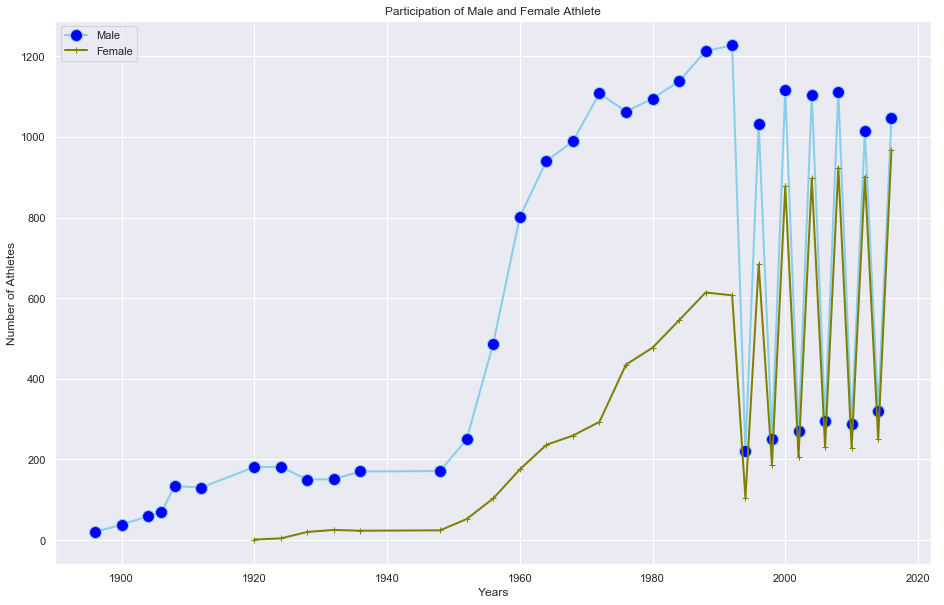

In [520]:
plt.title("Participation of Male and Female Athlete")
plt.xlabel("Years")
plt.ylabel("Number of Athletes")
plt.plot( male['Year'],male['Count'], marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=2,label="Male")
plt.plot( female['Year'], female['Count'], marker='+',markerfacecolor='green', color='olive', linewidth=2,label="Female")
plt.legend(loc='upper left')